In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def load_data():
    X = np.load("./data/ex7_X.npy")
    return X

In [12]:
def find_closest_centroids(X, centroids):
    # Returns the index of the closest centroids for each member of X
    closests = np.zeros((X.shape[0],))

    for j in range(X.shape[0]):
        t_ = np.sqrt(np.power(X[j,0]-centroids[:,0],2) + np.power(X[j,1]-centroids[:,1],2))
        closests[j] = np.argmin(t_)
    return closests

X = load_data()

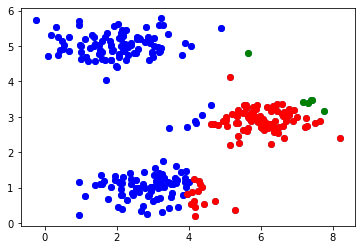

First three elements in idx are: [0. 2. 1.]


In [13]:
centroids = np.array([[3,3], [6,2], [8,5]])
X = load_data()
plt.scatter(X[:,0],X[:,1])
idx = find_closest_centroids(X, centroids)

cat = idx == 0
plt.scatter(X[cat,0],X[cat,1],c="b")

cat = idx == 1
plt.scatter(X[cat,0],X[cat,1],c="r")

cat = idx == 2
plt.scatter(X[cat,0],X[cat,1],c="g")
plt.show()

print("First three elements in idx are:", idx[:3])

In [14]:
def compute_centroids(X, idx, k):
    # Returns the new centroids by calculating the means of
    # the new dataset.

    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cat = idx == i
        X_ = X[cat,:]
        centroids[i,:] = np.mean(X_, axis = 0)
    
    return centroids
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:\n", centroids)

The centroids are:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [118]:
def kMenas__init_centroids(X, K):
    """
    Getting the random initial points for K-means algorithm
    """
    randidx = np.random.permutation(X)
    return randidx[:K]

def run_k_means(X, initialCentroids, maxIters = 10, plotProgress = False):
    """
    Runs the k-means algorithm on the provided dataset from initial centroids
    """

    # Initialize values
    m,n = X.shape
    k = initialCentroids.shape[0]
    centroids = initialCentroids

    for i in range(maxIters):
        print(f"Iteration: {i}")
        closests = find_closest_centroids(X, centroids)
        centroids_ = compute_centroids(X, closests, k)

        if plotProgress:
            for j in range(k):
                plt.plot([centroids_[j,0],centroids[j,0]],[centroids_[j,1],centroids[j,1]], c = "black")
                
            if plotProgress:
                plt.scatter(centroids[:,0],centroids[:,1], marker="x", c = "black")
        
        centroids = centroids_

    for i in range(k):
        X_ = X[closests == i]
        if plotProgress:
            plt.scatter(X_[:,0], X_[:,1])

    if plotProgress:
        plt.show()
    return centroids, closests

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
3
3
3


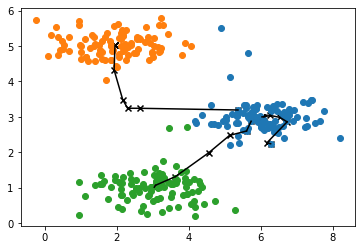

In [106]:
# Load an example dataset
X = load_data()

# Set initial centroids
# initialCentroids = np.array([[3,3],[6,2],[8,5]])
initialCentroids = kMenas__init_centroids(X, 3)

# Number of iterations
maxIters = 10

centroids, idx = run_k_means(X, initialCentroids, maxIters, plotProgress=True)

The shape of the image is (128, 128, 3)


(16384, 3)

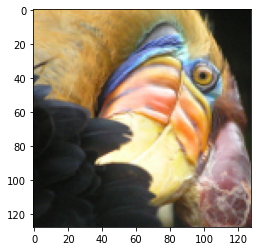

In [115]:
# Read the image
img = plt.imread("./data/bird_small.png")

# Visualize the image
plt.imshow(img)

print(f"The shape of the image is {img.shape}")

x_img = np.reshape(img, (img.shape[0]*img.shape[1],3))
x_img.shape

In [134]:
init = kMenas__init_centroids(x_img, 16)
centers, closests = run_k_means(x_img, init, 10, plotProgress=False)
closests


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9


array([13., 13., 13., ...,  4.,  4., 15.])

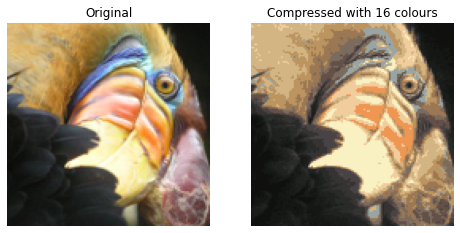

In [152]:
recovered = centers[closests.astype(np.int32), :]
recovered = np.reshape(recovered, img.shape)

# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(recovered)
ax[1].set_title('Compressed with %d colours'%16)
ax[1].set_axis_off()